# Module 2- Plotting in Financial Markets

### Query 2.1 
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

>Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock

>This would be helpful if we are to train our model to take NLP inputs.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 7})

In [2]:
df = pd.read_csv('week2.csv')
df.dtypes

Unnamed: 0                  int64
Symbol                     object
Series                     object
Date                       object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
Day_Perc_Change           float64
Trend                      object
dtype: object

In [3]:
df.Date = df.Date.astype('datetime64[ns]')
df.index = df.Date
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,
2017-05-15,SONATSOFTW,EQ,2017-05-15,163.60,164.90,165.00,162.10,162.45,162.65,163.09,53383,8706165.55,1251,35924,67.29,0.000000,Slight or No Change
2017-05-16,SONATSOFTW,EQ,2017-05-16,162.65,163.00,163.95,158.00,158.50,158.60,160.17,270635,43346778.55,5672,155739,57.55,-2.490009,Negative
2017-05-17,SONATSOFTW,EQ,2017-05-17,158.60,158.50,159.85,157.55,158.00,158.25,158.62,56955,9034082.85,1206,37437,65.73,-0.220681,Slight or No Change
2017-05-18,SONATSOFTW,EQ,2017-05-18,158.25,158.25,161.75,156.55,156.75,157.40,158.69,169341,26872646.85,3728,85633,50.57,-0.537125,Slight Negative
2017-05-19,SONATSOFTW,EQ,2017-05-19,157.40,156.60,159.00,150.30,151.70,151.90,154.00,167554,25803272.65,2082,117644,70.21,-3.494282,Among Top losers


<IPython.core.display.Javascript object>


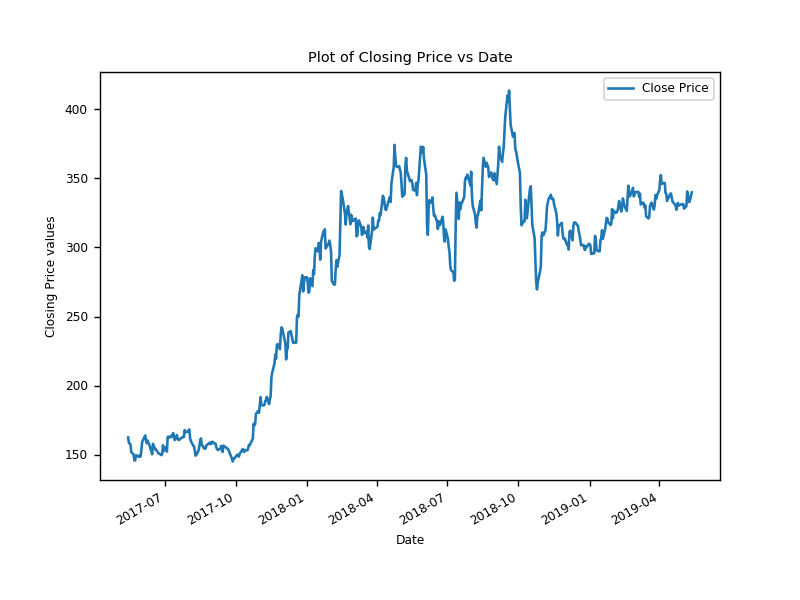

In [65]:
%matplotlib nbagg
ax = df.plot(x = 'Date', y = 'Close Price')
text = plt.ylabel('Closing Price values')
txt = plt.title('Plot of Closing Price vs Date')

### Query 2.2
A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

<IPython.core.display.Javascript object>


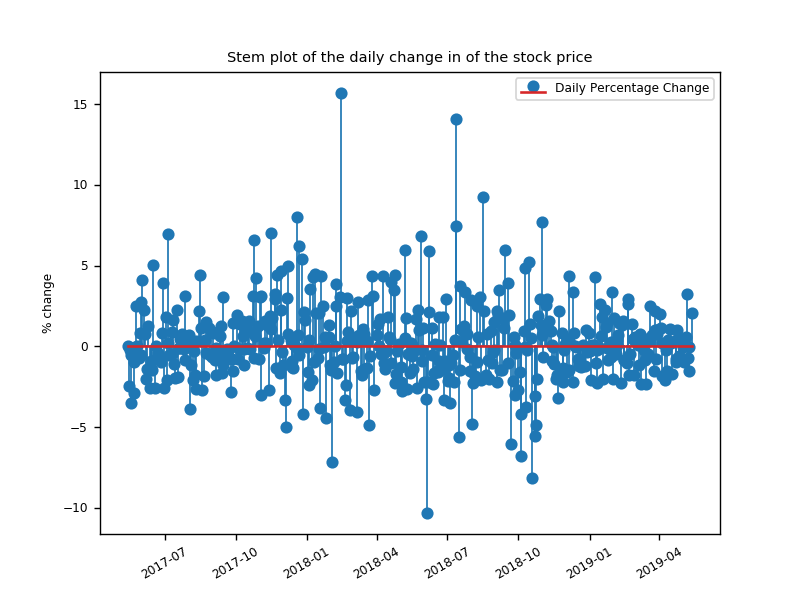

A large change can be observed on 2018-02-14(>15%) , 2018-07-12(>14%) and 2018-06-05(<-10%).


In [71]:
plt.figure()
markerline, stemlines, baseline = plt.stem(df['Date'], df['Day_Perc_Change'], label = 'Daily Percentage Change')
plt.setp(stemlines, 'linewidth', 1)
plt.setp(markerline, 'linewidth', 1)
plt.legend(loc = 'upper right')
plt.xticks(rotation=30)
plt.ylabel('% change')
plt.show()
print('A large change can be observed on 2018-02-14(>15%) , 2018-07-12(>14%) and 2018-06-05(<-10%).')
txt = plt.title('Stem plot of the daily change in of the stock price')

### Query 2.3
Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 

<IPython.core.display.Javascript object>


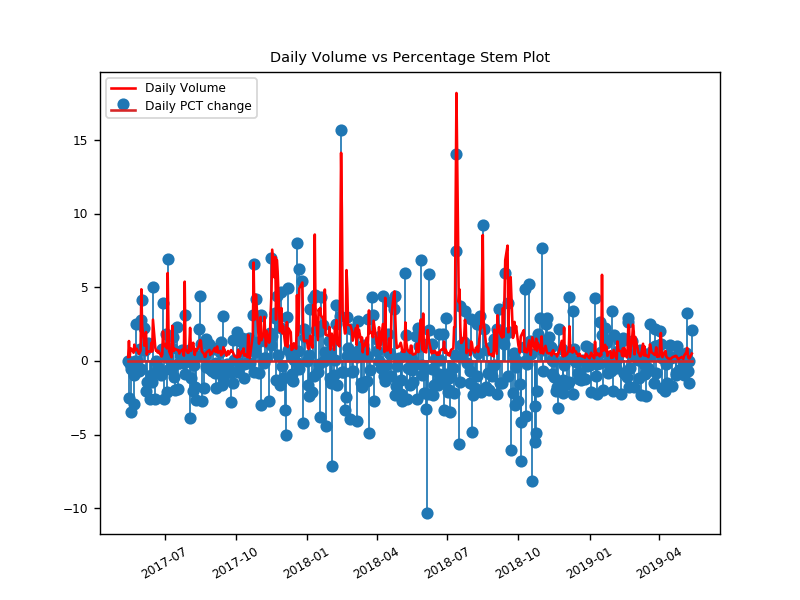

From the given graph, we can observe that the Daily Volume and PCT change are highly co-related and when ever Volume traded increases PCT change also increases.
The maximum and minimum of volume coincides with the maximum and minimum of PCT change.


In [70]:
plt.figure()
markerline, stemlines, baseline = plt.stem(df['Date'], df['Day_Perc_Change'], label = 'Daily PCT change')
plt.setp(stemlines, 'linewidth', 1)
plt.plot(df['Date'], df['Total Traded Quantity']/200000, color = 'red', label = 'Daily Volume')
plt.legend(loc = 'upper left')
plt.plot()
plt.xticks(rotation = 30)
print('From the given graph, we can observe that the Daily Volume and PCT change are highly co-related and when ever Volume traded increases PCT change also increases.')
print('The maximum and minimum of volume coincides with the maximum and minimum of PCT change.')
txt = plt.title('Daily Volume vs Percentage Stem Plot')

### Query 2.4
We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type. 

<IPython.core.display.Javascript object>


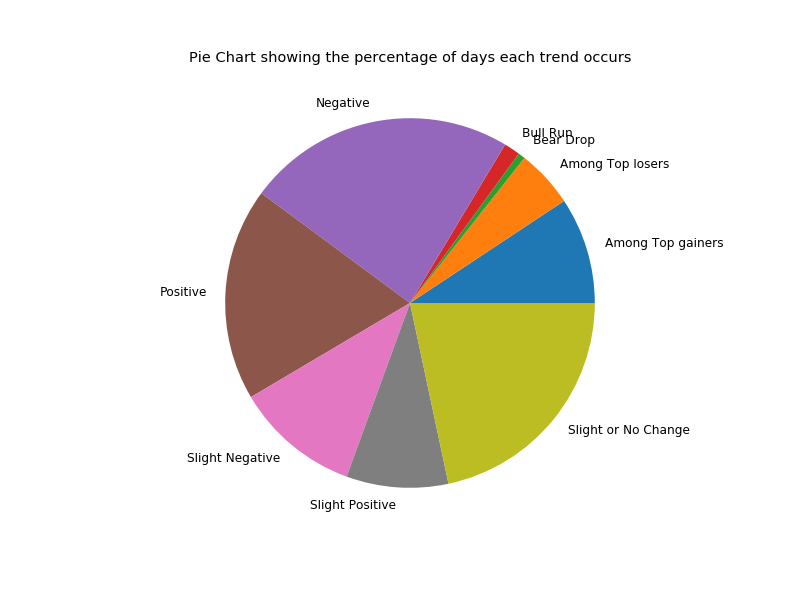

Percentages of days each trend occurs


Trend
Among Top gainers       9.311741
Among Top losers        5.060729
Bear Drop               0.607287
Bull Run                1.417004
Negative               23.481781
Positive               18.623482
Slight Negative        10.931174
Slight Positive         8.906883
Slight or No Change    21.659919
Name: count, dtype: float64

In [8]:
plt.figure()
pielabels = np.array(df.groupby('Trend')['Date'].agg(['count']).index)
xaxislabels = np.array(df.groupby('Trend').agg(['count'])['Date']['count'])
patches , text = plt.pie( x = xaxislabels, labels = pielabels)
plt.title('Pie Chart showing the percentage of days each trend occurs')
print('Percentages of days each trend occurs')
(df.groupby('Trend').agg(['count'])['Date']['count']/494)*100

### Query 2.5
Plot the daily return (percentage) distribution as a histogram.
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

<IPython.core.display.Javascript object>


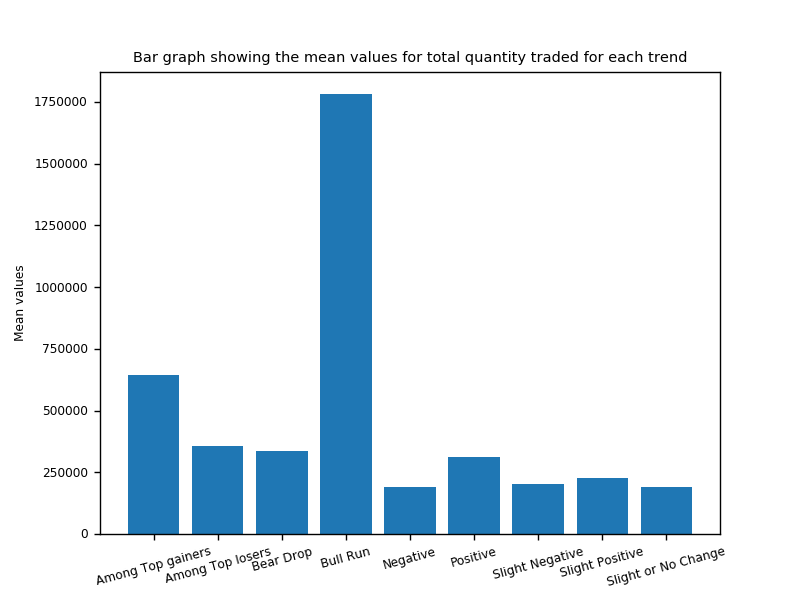

<IPython.core.display.Javascript object>


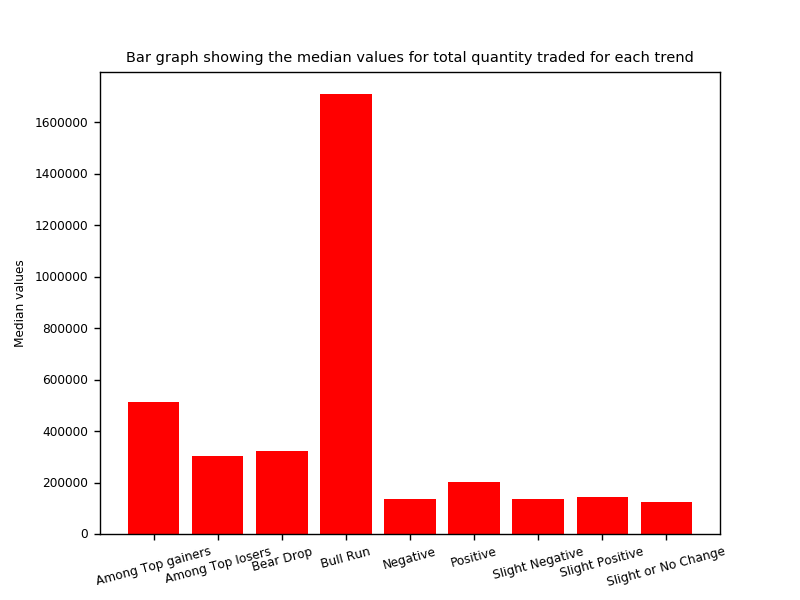

In [9]:
plt.figure()
meanarr = np.array(df.groupby('Trend')['Total Traded Quantity'].agg(['mean'])['mean'])
labels = list(df.groupby('Trend')['Date'].agg(['count']).index)
plt.bar(labels, meanarr)
plt.xticks(rotation = 15)
plt.ylabel('Mean values')
# plt.xlabel('Trends')
title = plt.title('Bar graph showing the mean values for total quantity traded for each trend')

plt.figure()
medianarr = np.array(df.groupby('Trend')['Total Traded Quantity'].agg(['median'])['median'])
labels = list(df.groupby('Trend')['Date'].agg(['count']).index)
plt.bar(labels, medianarr, color = 'red')
plt.xticks(rotation = 15)
plt.ylabel('Median values')
# plt.xlabel('Trends')
title = plt.title('Bar graph showing the median values for total quantity traded for each trend')

<IPython.core.display.Javascript object>


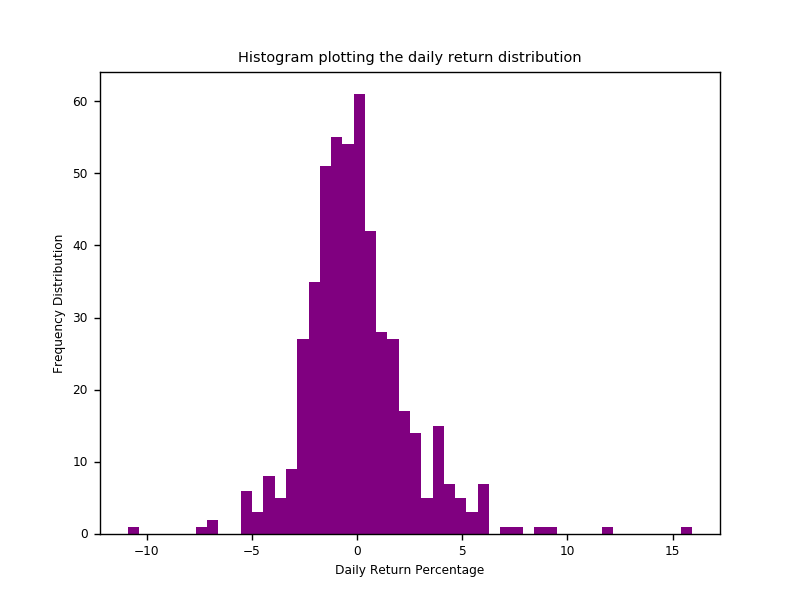

In [10]:
daily_return = ((df['Close Price'] - df['Open Price'])/df['Open Price'])*100
plt.figure()
x = plt.hist(daily_return, bins = 50, color = 'purple')
plt.xlabel('Daily Return Percentage')
plt.ylabel('Frequency Distribution')
text = plt.title('Histogram plotting the daily return distribution')

### Query 2.6

We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price. 

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification. 

In [11]:
df1 = pd.DataFrame(pd.read_csv(r'C:\Users\DELL\Desktop\Internship1\IDBI.csv'))
df1.Date = df1.Date.astype('datetime64[ns]')
df1.set_index(['Date'],inplace = True)
df1 = pd.DataFrame(df1.where(df1['Series'] == 'EQ')['Close Price'])
df1.columns = ['IDBI']

df2 = pd.read_csv(r'C:\Users\DELL\Desktop\Internship1\PNB.csv')
df2.Date = df2.Date.astype('datetime64[ns]')
df2.set_index(['Date'],inplace = True)
df2 = pd.DataFrame(df2.where(df2['Series'] == 'EQ')['Close Price'])
df2.columns = ['PNB']

df3 = pd.read_csv(r'C:\Users\DELL\Desktop\Internship1\PVR.csv')
df3.Date = df3.Date.astype('datetime64[ns]')
df3.set_index(['Date'],inplace = True)
df3 = pd.DataFrame(df3.where(df3['Series'] == 'EQ')['Close Price'])
df3.columns = ['PVR']

df4 = pd.read_csv(r'C:\Users\DELL\Desktop\Internship1\RAYMOND.csv')
df4.Date = df4.Date.astype('datetime64[ns]')
df4.set_index(['Date'],inplace = True)
df4 = pd.DataFrame(df4.where(df4['Series'] == 'EQ')['Close Price'])
df4.columns = ['RAYMOND']

df5 = pd.read_csv(r'C:\Users\DELL\Desktop\Internship1\RELIANCE.csv')
df5.Date = df5.Date.astype('datetime64[ns]')
df5.set_index(['Date'],inplace = True)
df5 = pd.DataFrame(df5.where(df5['Series'] == 'EQ')['Close Price'])
df5.columns = ['RELIANCE']

comb_df = pd.DataFrame(df['Close Price'])
comb_df.columns = [df.iloc[0]['Symbol']]
comb_df = comb_df.join(df1)
comb_df = comb_df.join(df2)
comb_df = comb_df.join(df3)
comb_df = comb_df.join(df4)
comb_df = comb_df.join(df5)
comb_df.head()

,SONATSOFTW,IDBI,PNB,PVR,RAYMOND,RELIANCE
Date,,,,,,
2017-05-15,162.65,75.05,166.80,1524.95,772.80,1344.10
2017-05-16,158.60,76.65,174.15,1539.00,785.00,1356.30
2017-05-17,158.25,75.95,165.05,1530.30,783.65,1353.10
2017-05-18,157.40,69.95,158.50,1515.05,746.95,1327.35
2017-05-19,151.90,68.75,155.20,1513.55,723.10,1318.85


<IPython.core.display.Javascript object>


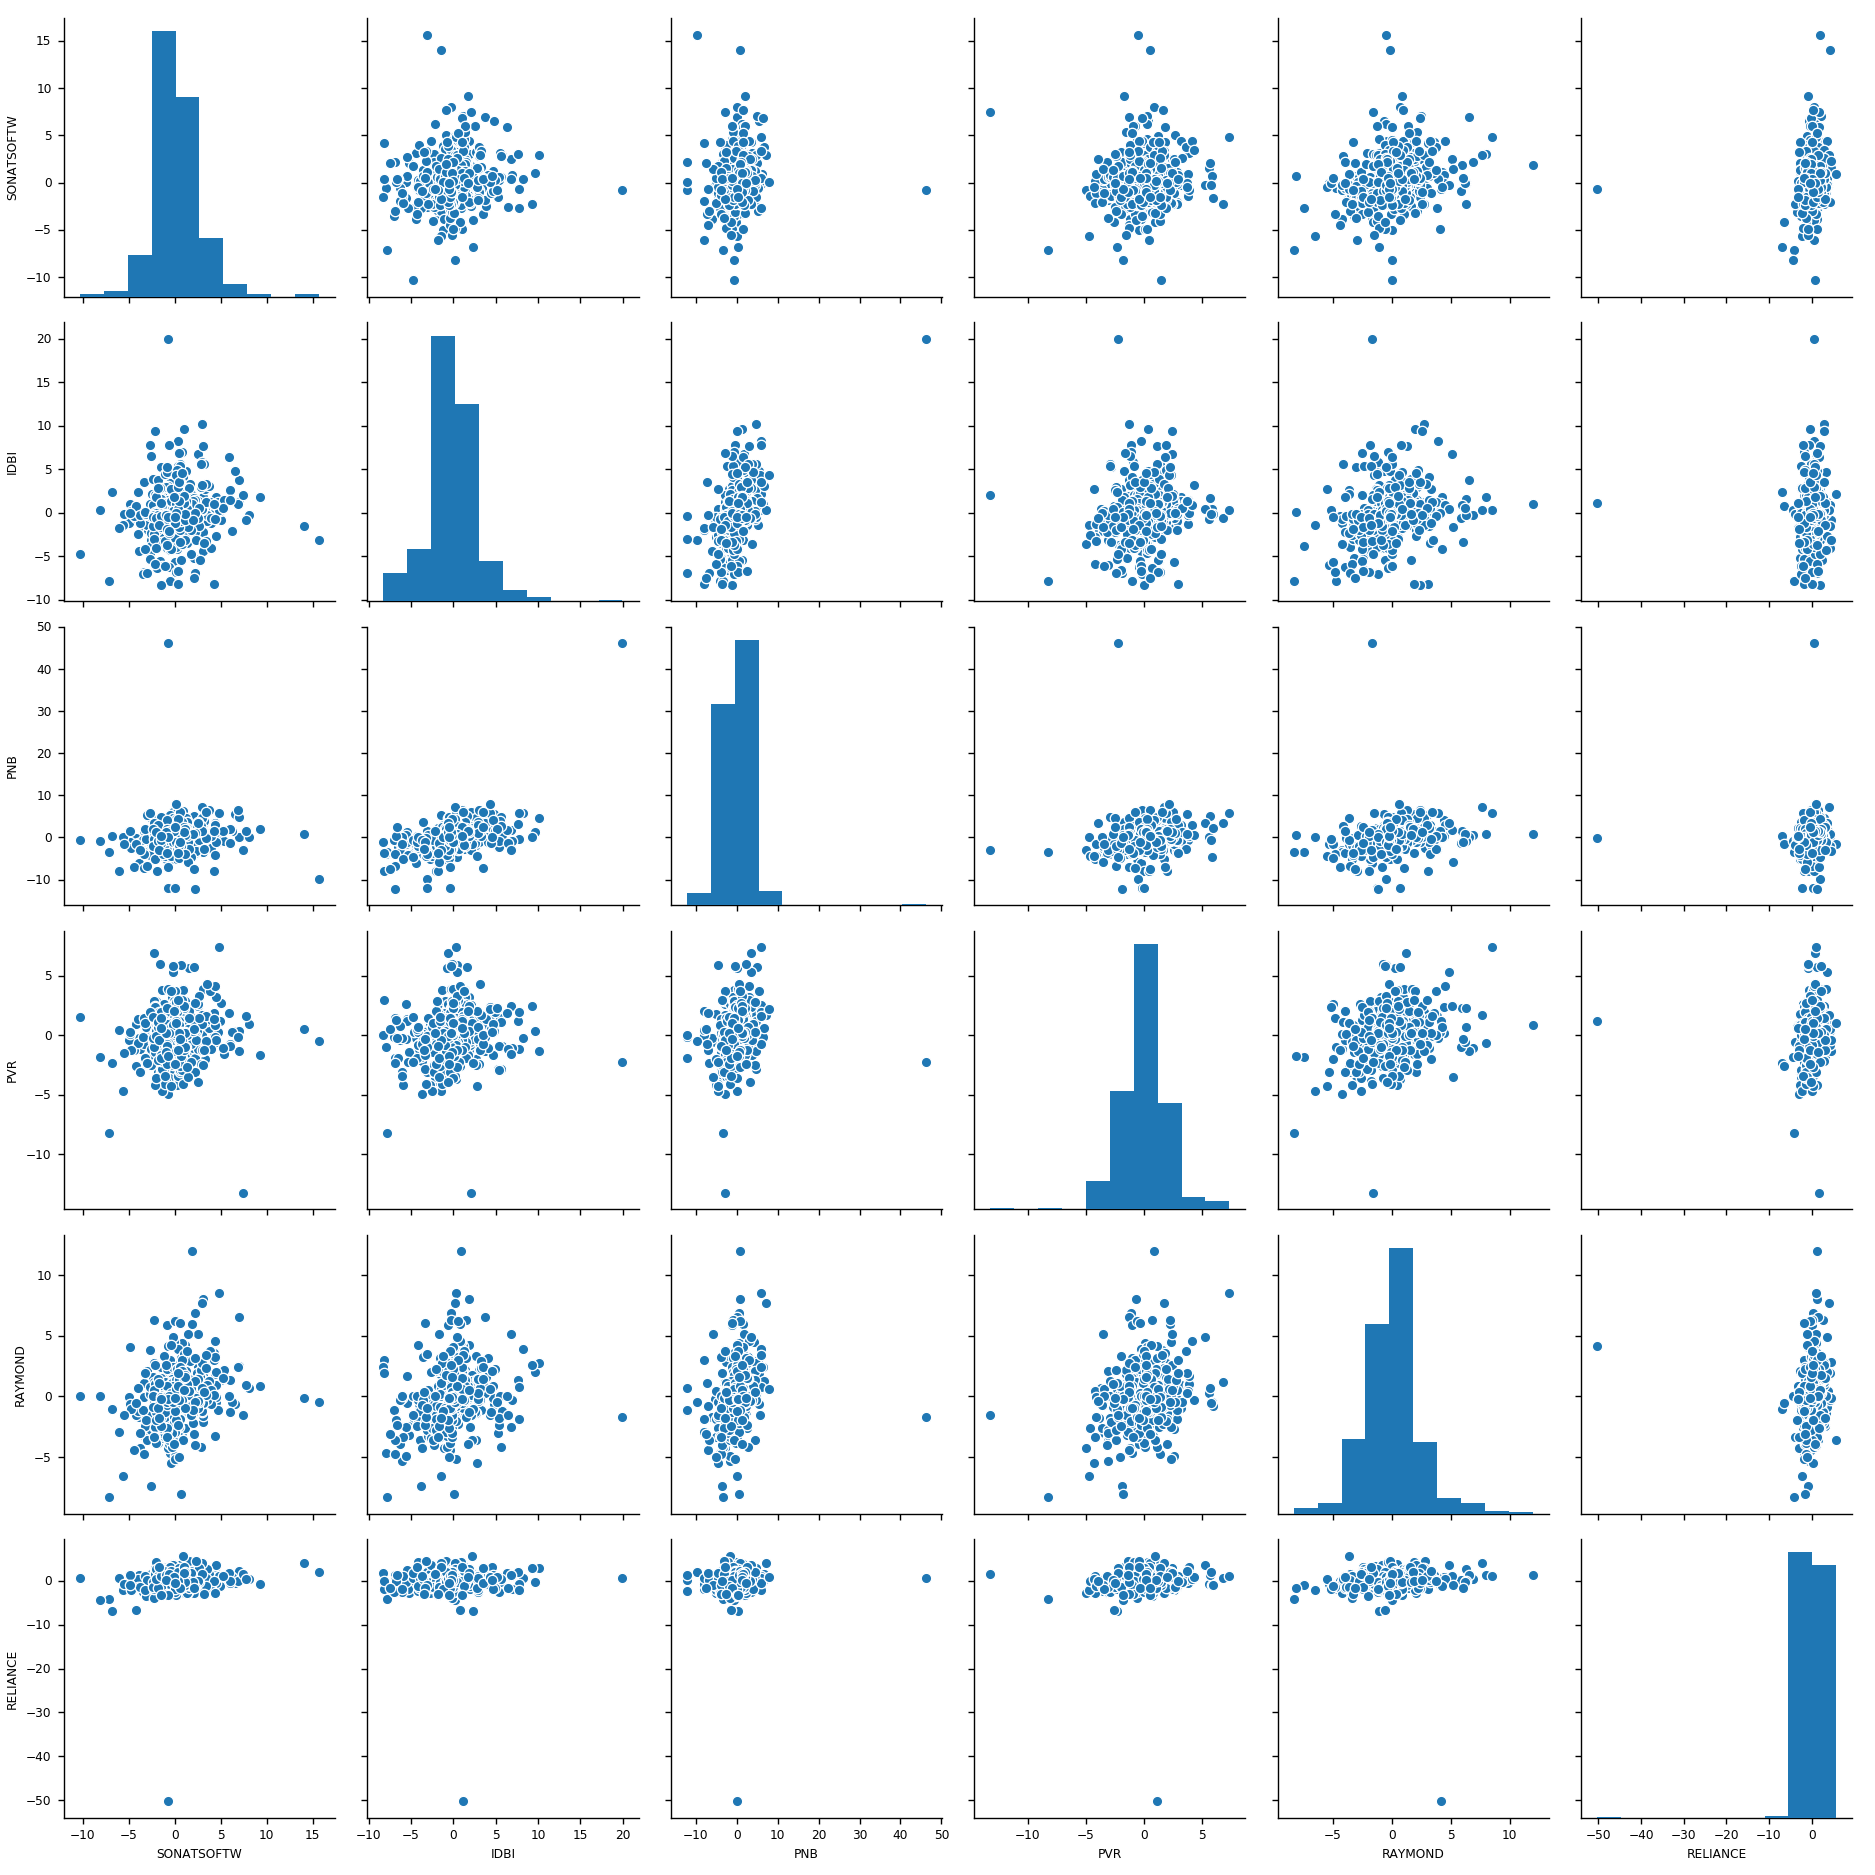

In [12]:
new_comb_df = (comb_df.pct_change()*100).dropna()
ax = sns.pairplot(new_comb_df)

### Query 2.7
Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read.
You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.
Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

In [61]:
new_comb_df['SONATSOFTW'].rolling(window = 7).mean().dropna()[:10]

Date
2017-05-24   -1.522210
2017-05-25   -0.809351
2017-05-26   -0.777825
2017-05-29   -0.801327
2017-05-30   -0.186781
2017-05-31   -0.131474
2017-06-01    0.679549
2017-06-02    1.272483
2017-06-05    1.233597
2017-06-06    1.338833
Name: SONATSOFTW, dtype: float64

### Query 2.8
Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3) 

<IPython.core.display.Javascript object>


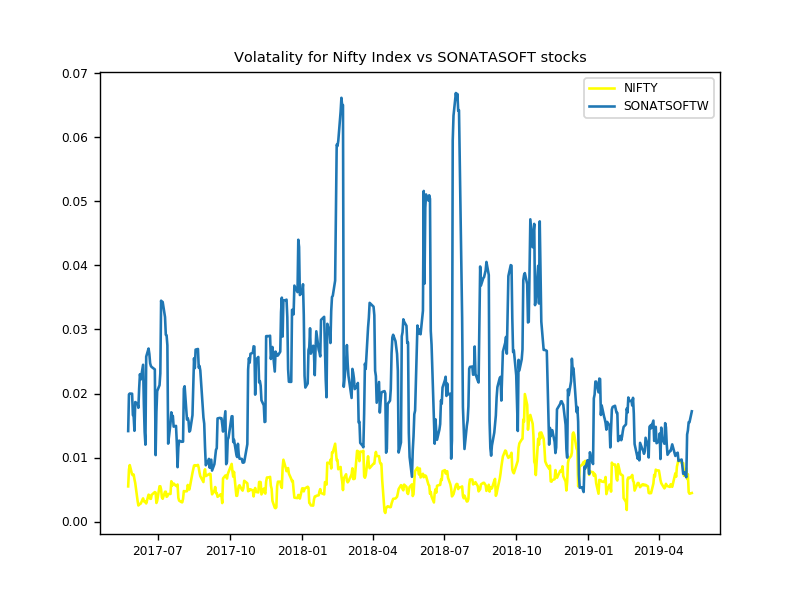

In [69]:
plt.figure()
df1 = pd.DataFrame(pd.read_csv(r'C:\Users\DELL\Desktop\Internship1\NIFTY.csv'))
df1.Date = df1.Date.astype('datetime64[ns]')
df1.set_index(['Date'],inplace = True)
df1 = pd.DataFrame(df1.pct_change())
df1 = pd.DataFrame(df1['Close'].rolling(window = 7).std())
df1.columns = ['NIFTY']
df1.dropna(inplace = True)
plt.plot(df1, color = 'yellow')
plt.plot((new_comb_df['SONATSOFTW']/100).rolling(window = 7).std().dropna())
text = plt.legend(['NIFTY', 'SONATSOFTW'])
txt = plt.title('Volatality for Nifty Index vs SONATASOFT stocks')

### Query 2.9
Trade Calls - Using Simple Moving Averages. Study about moving averages here. 

Plot the 21 day and 34 day Moving average with the average price and decide a Call ! 
Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. 
One of the most widely used technical indicators.

<IPython.core.display.Javascript object>


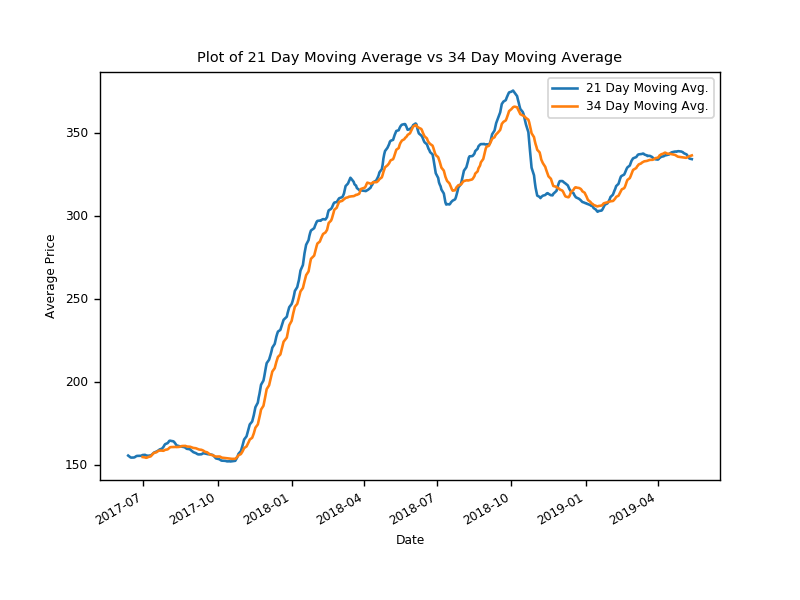

In [72]:
plt.figure()
df['Average Price'].rolling(window=21).mean().dropna().plot()
df['Average Price'].rolling(window=34).mean().dropna().plot()
plt.ylabel('Average Price')
le = plt.legend(['21 Day Moving Avg.', '34 Day Moving Avg.'])
tx = plt.title('Plot of 21 Day Moving Average vs 34 Day Moving Average')

### Query 2.10

Trade Calls - Using Bollinger Bands 
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average 
The bollinger bands comprise the following data points- 

> The 14 day rolling mean of the closing price (we call it the average) 
> Upper band which is the rolling mean + 2 standard deviations away from the average. 
> Lower band which is the rolling mean - 2 standard deviations away from the average.

Average Daily stock price.
Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. 

Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. 
Save to a new csv file. 

<IPython.core.display.Javascript object>


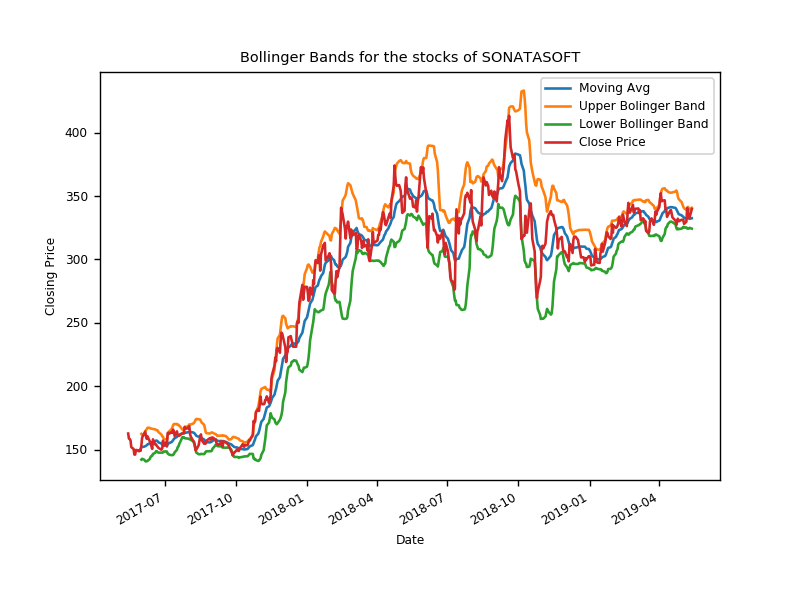

In [73]:
temp_df = df
df['Close Price'].rolling(window = 14).mean().plot()
(df['Close Price'].rolling(window = 14).std()*2 + df['Close Price'].rolling(window = 14).mean()).plot()
(-df['Close Price'].rolling(window = 14).std()*2 + df['Close Price'].rolling(window = 14).mean()).plot()
df['Close Price'].plot()
plt.ylabel('Closing Price')
plt.legend(['Moving Avg', 'Upper Bolinger Band', 'Lower Bollinger Band','Close Price'])
txt = plt.title('Bollinger Bands for the stocks of SONATASOFT')

In [62]:
df.to_csv('week3.csv')